# Getting the optimal local Fourier approximation for MV-SDE

add description here

### Initialising libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## McKean-Vlasov SDE of Kuramoto's type.

### We put here the function to simulate the Brownian motion.

In [2]:
def simulate_dW(N,T):
    return np.random.normal(size= N, scale = np.sqrt(T/N[1]))

def simulate_dW_1d(N,T):
    return np.random.normal(size = N, scale = np.sqrt(T/N))

### We initialise the main class.

In [3]:
class SDE_Kuramoto_MV ():
    
    #### Check the correct passing of the arguments
    
    def __init__(self, x_0 = 0, sigma = 1, dW_t = simulate_dW((100,100),1),
                 T = 1, n_discr = 100, n_part = 100):
        self.x_0 = np.random.normal(size = n_part, scale = 0.2)
        self.sigma = sigma
        self.T = T
        self.n_discr = n_discr
        self.n_part = n_part
        self.dt = self.T / self.n_discr
        self.dW_t = dW_t
        self.x = self.get_path()
        
    #### Simulates the path according to Euler algorithm    
    def get_path(self):
        x = np.zeros((self.n_part,self.n_discr))
        
        sum_sin = 0
        sum_cos = 0
        
        for j in range(self.n_part):
            x[j][0] = self.x_0[j]
            sum_sin += np.sin(x[j][0])
            sum_cos += np.cos(x[j][0])
        aver_sin = sum_sin / self.n_part
        aver_cos = sum_cos / self.n_part
        
        for i in range(1,self.n_discr):
            for j in range(self.n_part):
                
                x[j][i] = x[j][i - 1] + (np.cos(x[j][i - 1]) * aver_sin 
                                      - np.sin(x[j][i - 1]) * aver_cos) * self.dt + self.sigma * self.dW_t[j][i - 1]
                sum_sin += np.sin(x[j][i])
                sum_cos += np.cos(x[j][i])
            
            aver_sin = sum_sin / self.n_part
            aver_cos = sum_cos / self.n_part
            
            aver_sin
            
            sum_sin = 0
            sum_cos = 0
        return x
    
    #### Plots the path
    def plot_path(self):
        t = np.linspace(0, self.T, self.n_discr)
        
        fig, ax = plt.subplots(1,1,figsize=(15, 10), tight_layout=True)

        ax.set_title(r"Dynamics of the SDE", fontsize = 15)
        ax.set_xlabel(r'$t$',fontsize = 15)
        ax.set_ylabel(r'$X_t$',fontsize = 15)
        ax.tick_params(axis='both', which='major', labelsize = 20)
        ax.tick_params(axis='both', which='minor', labelsize = 20)
        for i in range(self.n_part):
            ax.plot(t, self.x[i][:])
        #ax.plot(t,[0]*t.shape[0],label = 'asymptote')
        plt.show()

        #ksi = self.get_path_for_gradient_SDE()

### Testing the class.

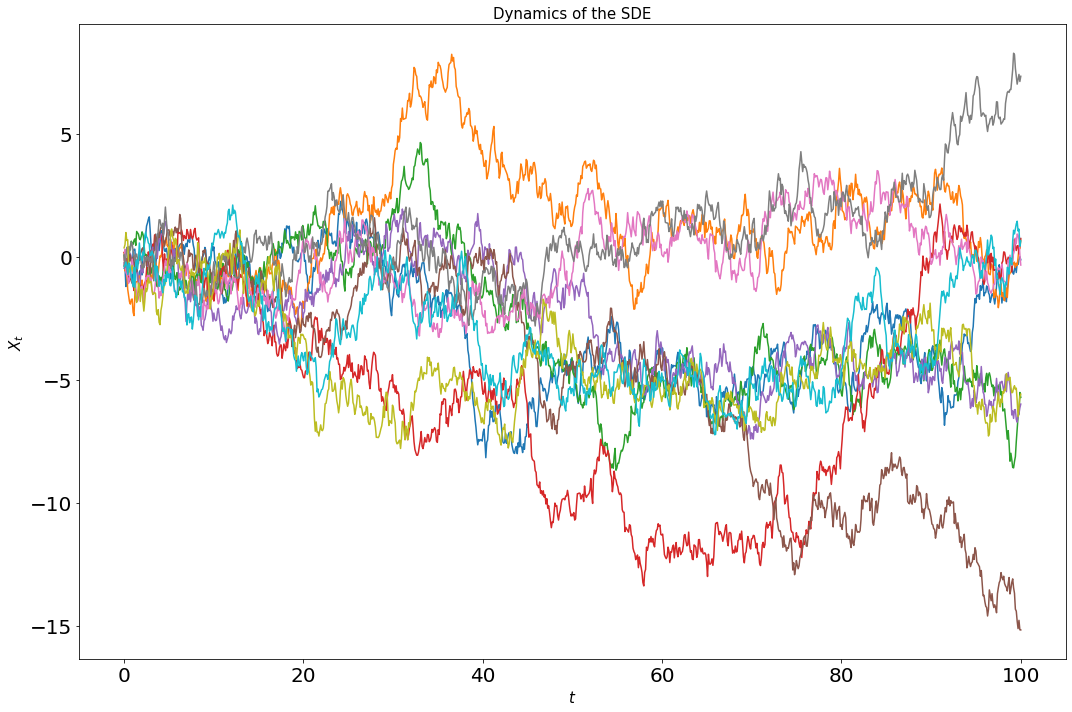

In [4]:
# Discretisation step to render the SDE and Gamma

# Initialise the number of Euler discretisation steps and time horizon
n_discr = 1000
T = 100
dt = T / n_discr

# Initialise the number of particles
n_part = 10

# Initialise the starting value and diffusion constant
x_0 = 1
sigma = 1

# Get the Wiener increments
dW_t = simulate_dW((n_part,n_discr),T)

# Initialise the class and render the dynamics
X = SDE_Kuramoto_MV(x_0, sigma, dW_t, T, n_discr, n_part)
X.plot_path()

## The approximation of MV-SDE's of Kuramoto type.

In [5]:
class SDE_Kuramoto_appr ():
    
    ### Check the correct passing of the arguments
    
    def __init__(self, x_0 = 0, sigma = 1, 
                 gamma = np.random.uniform(low = -1, high = 1, size = (2,100)), 
                 dW_t = simulate_dW_1d(100,1),  T = 1, n_discr = 100):
        self.x_0 = x_0
        self.sigma = sigma
        self.T = T
        self.n_discr = n_discr
        self.dt = self.T / self.n_discr
        self.gamma = gamma
        self.dW_t = dW_t
        self.x = self.get_path()
        self.ksi = self.get_path_for_gradient_SDE(k = 0, n = 0)
        
        
    #### Simulates the path according to Euler algorithm    
    def get_path(self):
        x = np.zeros(self.n_discr)
        x[0] = self.x_0 
        for i in range(1,self.n_discr):

            x[i] = x[i - 1] + (self.gamma[0][i - 1] * np.sin(x[i - 1]) - self.gamma[1][i - 1] * np.cos(x[i - 1])) * self.dt + self.sigma * self.dW_t[i - 1]
        return x
#############
#############

#######DOUBLE CHECK FOR SIN VS COS

############
############

    def get_path_for_gradient_SDE(self,k,n):
        ksi = np.zeros(self.n_discr)
        for i in range(1,self.n_discr):
            ## check if i == n or n + 1
            if k == 0:
                if (i == n):
                    ksi[i] = ksi[i - 1] + (np.sin(self.x[i - 1]) + 
                                                 self.gamma[0][i - 1] * np.cos(self.x[i - 1]) * ksi[i - 1] + 
                                                 self.gamma[1][i - 1] * np.sin(self.x[i - 1]) * ksi[i - 1]) * self.dt + self.sigma * self.dW_t[i - 1] 
                elif (i != n):
                    ksi[i] = ksi[i - 1] + (self.gamma[0][i - 1] * np.cos(self.x[i - 1]) * ksi[i - 1] + 
                                                 self.gamma[1][i - 1] * np.sin(self.x[i - 1]) * ksi[i - 1]) * self.dt + self.sigma * self.dW_t[i - 1]
            ### CHECK the signs 
            
            elif k == 1:
                if (i == n):
                    ksi[i] = ksi[i - 1] + (-np.cos(self.x[i - 1]) + 
                                                     self.gamma[0][i - 1] * np.cos(self.x[i - 1]) * ksi[i - 1] + 
                                                     self.gamma[1][i - 1] * np.sin(self.x[i - 1]) * ksi[i - 1]) * self.dt + self.sigma * self.dW_t[i - 1]   
                elif (i != n):
                    ksi[i] = ksi[i - 1] + (self.gamma[0][i - 1] * np.cos(self.x[i - 1]) * ksi[i - 1] + 
                                                 self.gamma[1][i - 1] * np.sin(self.x[i - 1]) * ksi[i - 1]) * self.dt + self.sigma * self.dW_t[i - 1]
        return ksi
    
    #### Plots the path
    def plot_path(self):
        t = np.linspace(0, self.T, self.n_discr)
        
        fig, ax = plt.subplots(1,1,figsize=(15, 10), tight_layout=True)

        ax.set_title(r"Dynamics of the SDE", fontsize = 15)
        ax.set_xlabel(r'$t$',fontsize=15)
        ax.set_ylabel(r'$X_t$',fontsize=15)
        ax.tick_params(axis='both', which='major', labelsize = 20)
        ax.tick_params(axis='both', which='minor', labelsize = 20)
        ax.plot(t, self.x)
        ax.plot(t, self.ksi)
        #ax.plot(t, self.ksi[1])
        plt.show()
        
    def plot_grad_path(self):
        t = np.linspace(0, self.T, self.n_discr)
        
        fig, ax = plt.subplots(1,1,figsize=(15, 10), tight_layout=True)

        ax.set_title(r"Dynamics of the gradient SDE", fontsize = 15)
        ax.set_xlabel(r'$t$',fontsize=15)
        ax.set_ylabel(r'$\xi_t$',fontsize=15)
        ax.tick_params(axis='both', which='major', labelsize = 20)
        ax.tick_params(axis='both', which='minor', labelsize = 20)
        ax.plot(t, self.ksi[0])
        
        plt.show()
        
    def update_gamma(self, gamma):
        self.gamma = gamma
        x = self.get_path()
        #ksi = self.get_path_for_gradient_SDE()

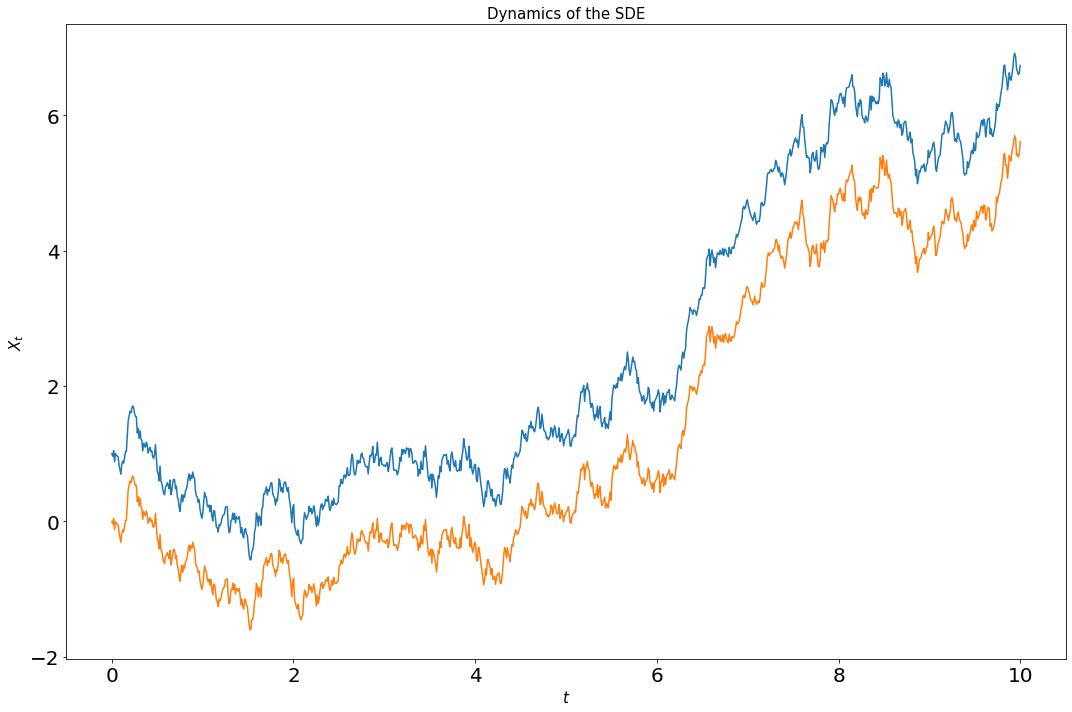

In [6]:
# Discretisation step to render the SDE and Gamma

# Initialisse the number of Euler discretisation steps and time horizon

n_discr = 1000
T = 10
dt = T / n_discr


# Initialise the starting value, drift function, starting guess for gamma and diffusion constant
x_0 = 1

gamma = np.random.uniform(low = - 1, high = 1, size = (2,n_discr))
sigma = 1

# Get the Wiener increments
dW_t = simulate_dW_1d(n_discr,T)

# Initialise the class and render the dynamics
X = SDE_Kuramoto_appr(x_0, sigma, gamma, dW_t, T, n_discr)
X.plot_path()
#X.plot_grad_path()

dW_t = simulate_dW((1,n_discr),T)

## Algorithm

In [36]:
eta = 0.01
N_iter = 100

# Initialise the number of Euler discretisation steps and time horizon

n_discr = 50
T = 1
dt = T / n_discr

# Initialise the starting value, starting guess for gamma and diffusion constant
x_0 = 1
sigma = 1

gamma = np.random.uniform(low = - 0.1, high = 0.1, size = (2,n_discr))
print(f'Starting gamma is {gamma}.')
err = np.inf
eps = 0

i = 0
gamma_aver = 0

while (err > eps) and (i < N_iter):

    
    dW_t_1 = simulate_dW_1d(n_discr,T)
    dW_t_2 = simulate_dW_1d(n_discr,T)
    X_1 = SDE_Kuramoto_appr(x_0, sigma, gamma, dW_t_1, T, n_discr)
    X_2 = SDE_Kuramoto_appr(x_0, sigma, gamma, dW_t_2, T, n_discr)
        
    grad_first_part = np.zeros((2,n_discr))
    grad_first_part[0] = 2 * (np.sin(X_1.x) - gamma[0])
    grad_first_part[1] = 2 * (-np.cos(X_1.x) - gamma[1])
    grad_first_part = grad_first_part.reshape(2 * n_discr)
    
    jacobian = np.zeros((2 * n_discr, 2 * n_discr))
    
    for i_1 in range(n_discr):
        for k_1 in range(2):
            for i_2 in range(n_discr):
                for k_2 in range(2):
                    if k_1 == 0:
                        jacobian[k_1 * n_discr + i_1][k_2 * n_discr + i_2] = np.cos(X_2.x[i_1]) * X_2.get_path_for_gradient_SDE(k_2,i_2)[i_1] - (i_1 == i_2 and k_1 == k_2)
                    elif k_1 == 1:
                        jacobian[k_1 * n_discr + i_1][k_2 * n_discr + i_2] = np.sin(X_2.x[i_1]) * X_2.get_path_for_gradient_SDE(k_2,i_2)[i_1] - (i_1 == i_2 and k_1 == k_2)
    
    ### Save Jacobian as a tensor?
    
    gamma = gamma.reshape(2*n_discr)
    #print(gamma.shape)
    gamma = gamma - eta * np.matmul(grad_first_part,jacobian)
    gamma = gamma.reshape(2,n_discr)
    #print(gamma.shape)
    i += 1
    
    
    # ToDo: save the gamma for later to calculate the weighted average further on 
    
    gamma_aver = i / (i + 1) * gamma_aver + 1 / (i + 1) * gamma
    print(f'Gamma average for {i} iteration is: \n {gamma_aver}')
    
print(f'The solution of the SGD algorithm is {gamma_aver}.')



Starting gamma is [[-0.04422985 -0.06613253 -0.08576489  0.08527847 -0.07280439  0.05951053
   0.01522146  0.08849544  0.01450389 -0.01859954  0.09938094 -0.0105132
   0.03241975  0.09435454 -0.09815074  0.05476106  0.08793495 -0.00922904
   0.01550005  0.02950696 -0.03110935 -0.00795778  0.05857286 -0.07656171
   0.07120191  0.05880107  0.09117056 -0.05484113  0.06031717 -0.04786735
   0.0163676  -0.01384189  0.01237734 -0.0143693  -0.07176373 -0.02584407
  -0.0757174  -0.06848047 -0.01835691 -0.01370484 -0.08791422 -0.09910748
   0.0059918   0.03093843 -0.05967184  0.0138466   0.04265446  0.04900913
  -0.00297142  0.01055229]
 [-0.05664881  0.05116236 -0.05542608 -0.02445301  0.07763097  0.0170891
  -0.03068289  0.05387537 -0.0481467   0.03982175  0.09204572  0.05923611
   0.02378867 -0.03898843 -0.0297604   0.09706349 -0.0696128  -0.01121442
  -0.04698974  0.04735577  0.06516734  0.03125859  0.07253988 -0.05307505
   0.00594377 -0.01242036 -0.09766235  0.03813684 -0.01781155 -0.0523

Gamma average for 7 iteration is: 
 [[1.18729039 1.20312451 1.1840018  1.31618493 1.18065754 1.28439672
  1.24896355 1.31197589 1.25224884 1.22879523 1.32402474 1.23411337
  1.26725211 1.31933284 1.1585893  1.28435312 1.31296741 1.23322247
  1.2516449  1.26174961 1.20949567 1.22460947 1.27295551 1.16435637
  1.28345131 1.27149458 1.29463754 1.17852884 1.26914566 1.1780345
  1.22703187 1.20310968 1.22542692 1.20166892 1.1510385  1.18699296
  1.14938102 1.15962452 1.19784688 1.19969765 1.13044569 1.11768487
  1.20282411 1.22109247 1.1433245  1.20551562 1.23083012 1.23417317
  1.1909394  1.20029344]
 [1.08430885 1.14783182 1.06143438 1.08235806 1.15881761 1.11099664
  1.07878312 1.14954155 1.06747157 1.14661602 1.19046915 1.16778886
  1.1403121  1.09252809 1.09550555 1.20052147 1.06824632 1.11363963
  1.08608678 1.16941452 1.18268152 1.15619016 1.18473141 1.08141371
  1.12910781 1.12073732 1.05678005 1.17268945 1.1268005  1.09495898
  1.21072232 1.0654846  1.16606798 1.0689376  1.1960635 

Gamma average for 14 iteration is: 
 [[0.93227482 1.00436965 0.98419989 1.11369084 0.97489301 1.07200103
  1.02979187 1.09231056 1.02878626 1.00789765 1.09379432 1.00210758
  1.02550586 1.07595614 0.91600232 1.04139126 1.06573168 0.97987559
  0.9990526  1.00655555 0.95438033 0.96569934 1.00822906 0.90118315
  1.0175935  1.00326398 1.02821615 0.91093702 0.99796385 0.90442089
  0.95214043 0.93102772 0.95358198 0.92554492 0.87383925 0.90589877
  0.86582973 0.87346887 0.90869019 0.90906642 0.83880287 0.82239127
  0.90528977 0.92127578 0.84354337 0.90438297 0.93070664 0.93211729
  0.88930641 0.89404637]
 [0.74463456 0.77663284 0.69882484 0.72379968 0.80073019 0.74809397
  0.71181421 0.78640535 0.70358714 0.791816   0.82921826 0.80847586
  0.77773757 0.73112052 0.73862437 0.84918273 0.71903097 0.76053973
  0.73758753 0.82563273 0.84410633 0.82335839 0.85432052 0.74983174
  0.7943537  0.78835301 0.73134031 0.84584977 0.8000161  0.76728537
  0.88253741 0.73970183 0.83776465 0.74256009 0.871593

Gamma average for 21 iteration is: 
 [[0.95872917 1.05519749 1.03638972 1.1610004  1.0254415  1.11675822
  1.07289638 1.13237669 1.06897578 1.05091674 1.12899877 1.03941541
  1.05912189 1.10607354 0.95108633 1.07230526 1.09270062 1.00672141
  1.02522511 1.02920018 0.97771154 0.98575353 1.02294107 0.92147619
  1.03123793 1.01573428 1.04238623 0.92767414 1.00836125 0.91852392
  0.96337159 0.94460403 0.96389462 0.93454519 0.88549796 0.91196799
  0.87136483 0.87742465 0.90986474 0.9100822  0.84433737 0.82568933
  0.90281241 0.91880609 0.84278736 0.90064727 0.92458059 0.92478954
  0.88590701 0.88837957]
 [0.69425779 0.70603936 0.63772001 0.66830437 0.74177708 0.69125813
  0.6556785  0.73008467 0.65112364 0.74215469 0.77688888 0.75575858
  0.729255   0.6865606  0.6965247  0.80701115 0.68174399 0.7213484
  0.7042996  0.79020636 0.81098909 0.79419852 0.82586489 0.7234597
  0.76304279 0.75785411 0.7066304  0.81810476 0.77383594 0.74096361
  0.85199242 0.71474054 0.81062653 0.72118777 0.84654927

Gamma average for 28 iteration is: 
 [[0.92265985 1.04201609 1.02296093 1.14176957 1.01089394 1.09508943
  1.05116253 1.10639806 1.04541657 1.02820164 1.09823543 1.0119439
  1.03038644 1.07310844 0.92433712 1.03886583 1.05669226 0.97334905
  0.99086386 0.99277296 0.94196474 0.946578   0.97815523 0.88136858
  0.98510139 0.96996707 0.99751573 0.88742322 0.96102704 0.87697612
  0.91843992 0.90255845 0.91919336 0.88983716 0.84388352 0.8645046
  0.82430904 0.82946715 0.85998528 0.86086851 0.80020541 0.77990906
  0.85153475 0.867137   0.79260577 0.8470179  0.86950444 0.86840774
  0.83317561 0.83579873]
 [0.58812326 0.58158759 0.51969194 0.55503036 0.62437373 0.57733267
  0.54360718 0.61707823 0.5440225  0.63362134 0.6660159  0.64539898
  0.62527792 0.58668699 0.59880132 0.70721208 0.58955656 0.62927315
  0.61609167 0.69704558 0.71839239 0.70615136 0.73876514 0.63783279
  0.67518195 0.67242458 0.62470342 0.73213537 0.68977088 0.65863543
  0.76515914 0.63377839 0.72627569 0.64249882 0.76266139

Gamma average for 35 iteration is: 
 [[0.92199005 1.05768396 1.03877651 1.15144141 1.02666436 1.10509155
  1.0624273  1.11354935 1.05551379 1.0380011  1.10154072 1.01916092
  1.03593343 1.07329698 0.93183916 1.03970771 1.05398206 0.97486534
  0.99104719 0.99151534 0.94352202 0.94610548 0.97349642 0.8811797
  0.97871853 0.96318803 0.99082692 0.88577969 0.95354716 0.87507702
  0.91364459 0.89969398 0.91489794 0.88614444 0.84261116 0.85939555
  0.81922778 0.82314835 0.85119711 0.85283208 0.79623972 0.77575669
  0.84215714 0.85694064 0.78479804 0.8356103  0.85657736 0.85504293
  0.82282847 0.82525756]
 [0.52342887 0.50327624 0.44757658 0.48546036 0.55293382 0.51152204
  0.48074335 0.55290654 0.48563428 0.57162399 0.60161036 0.58131369
  0.56615938 0.52943893 0.54423216 0.65003552 0.53923167 0.57968181
  0.56821523 0.64405611 0.66750668 0.65864734 0.69261628 0.5944931
  0.63016129 0.62934425 0.58633428 0.68939531 0.6506203  0.61956839
  0.72273206 0.59713969 0.68514003 0.60504968 0.71878266

Gamma average for 42 iteration is: 
 [[0.95958686 1.11116297 1.09310304 1.20001729 1.08168469 1.15493283
  1.11299739 1.16004938 1.10489648 1.08703895 1.14523745 1.0672581
  1.08118525 1.11337465 0.97780892 1.0789246  1.08865832 1.0134864
  1.02802951 1.02722896 0.98250708 0.98425685 1.00728733 0.91891742
  1.0099217  0.99410257 1.02121152 0.92171785 0.98489416 0.91203269
  0.94814497 0.93519615 0.94966436 0.92195815 0.88020509 0.89390168
  0.85305323 0.85545962 0.88174033 0.88373553 0.82957788 0.81069669
  0.87259003 0.88553704 0.81619273 0.86373856 0.88318339 0.8819679
  0.85169917 0.85491052]
 [0.50243303 0.46855044 0.41995683 0.4609202  0.52752853 0.49253541
  0.46446849 0.53721852 0.47517801 0.55787103 0.58573501 0.56703084
  0.55530719 0.52078894 0.53769466 0.63896436 0.53403759 0.57283325
  0.56444718 0.63616634 0.66208078 0.65664673 0.69005815 0.59545834
  0.62861658 0.62979047 0.59141064 0.68959939 0.65328035 0.622693
  0.72224246 0.60201556 0.68503379 0.60790661 0.71541106 0.

Gamma average for 49 iteration is: 
 [[0.92992199 1.09507402 1.07755562 1.17866504 1.06701357 1.1350018
  1.09431385 1.13823996 1.08572288 1.06778994 1.12039672 1.04681211
  1.05779327 1.08528013 0.95563245 1.05022659 1.05707555 0.98600165
  0.9992349  0.99779746 0.95566724 0.95683874 0.97667516 0.89253047
  0.97701349 0.96067382 0.98698897 0.89290951 0.9514824  0.88374983
  0.91764015 0.90539125 0.91862302 0.89177883 0.85070443 0.86290333
  0.82170672 0.82174802 0.84661278 0.84883777 0.7966596  0.77904456
  0.83677956 0.84863495 0.78178789 0.8263836  0.84382716 0.84359113
  0.81505479 0.81828083]
 [0.41907408 0.37392926 0.3306363  0.37340116 0.43980737 0.4091856
  0.3844697  0.45805021 0.40043817 0.47980224 0.50423186 0.48828252
  0.47792158 0.44486935 0.46302375 0.55950807 0.46066578 0.49859251
  0.49424551 0.56297269 0.5902801  0.58795179 0.62198819 0.53277839
  0.56380578 0.56721297 0.53324319 0.62619031 0.5928531  0.56321214
  0.65933663 0.5440866  0.62274192 0.5495953  0.65122968

Gamma average for 56 iteration is: 
 [[0.84983068 1.02306109 1.00626261 1.10219607 0.99740191 1.0605815
  1.02187415 1.06296106 1.01306368 0.99481844 1.04236059 0.97249979
  0.98044627 1.00383536 0.88012878 0.96788055 0.97185065 0.90545178
  0.91749576 0.91498354 0.87513966 0.87491787 0.89178952 0.81098383
  0.88951591 0.8731223  0.89871201 0.80940895 0.86400775 0.80107781
  0.8327196  0.82170115 0.83407667 0.80797452 0.76780268 0.77938137
  0.73846436 0.73716976 0.76120724 0.76349568 0.7133753  0.69658826
  0.75040548 0.76114522 0.69719984 0.73892469 0.75421626 0.75366412
  0.72594666 0.72955765]
 [0.28971369 0.23702098 0.19875046 0.24283861 0.31010863 0.28260178
  0.26103228 0.33425089 0.28111189 0.35590804 0.37665053 0.36254941
  0.35195993 0.31965658 0.33843871 0.43033738 0.33685288 0.3745393
  0.37348929 0.44004036 0.46856169 0.46882239 0.50308967 0.41929625
  0.44775606 0.45400561 0.42422228 0.51175084 0.48200647 0.45339983
  0.54473342 0.4351583  0.51075941 0.44168855 0.53798256

Gamma average for 63 iteration is: 
 [[0.82653361 1.00298731 0.98710026 1.07825844 0.97974118 1.03866413
  1.00191297 1.04030777 0.99266148 0.97434831 1.01769167 0.95086181
  0.95598348 0.97614713 0.85789272 0.93920531 0.94101506 0.87873747
  0.8901523  0.88655119 0.84934795 0.84803487 0.86245311 0.78481016
  0.85805424 0.84164236 0.86631762 0.78116419 0.83177846 0.77281916
  0.8020496  0.79233535 0.80455677 0.77915892 0.74057658 0.75124751
  0.71096962 0.70867064 0.73189781 0.7347244  0.68649898 0.67043607
  0.72092935 0.73095203 0.67007084 0.70874459 0.7220303  0.72129863
  0.69401403 0.69741862]
 [0.22114982 0.16397337 0.1305835  0.17551732 0.24332766 0.21845663
  0.19964946 0.27104263 0.22125488 0.29148644 0.30951267 0.29663018
  0.2850005  0.25362039 0.27358101 0.36118446 0.27250153 0.30966864
  0.3112695  0.37548136 0.40447822 0.40614331 0.43973927 0.36140607
  0.38756431 0.39549537 0.36866369 0.45010777 0.424153   0.39640622
  0.48283251 0.3789892  0.45159505 0.38611016 0.477057

Gamma average for 70 iteration is: 
 [[0.83074224 1.00882819 0.99412212 1.08049065 0.98751702 1.04245778
  1.00765667 1.04353149 0.99809511 0.9799253  1.01929352 0.95538652
  0.95847295 0.97584374 0.86288852 0.93841419 0.93859075 0.88028164
  0.89069913 0.88641614 0.8514743  0.84985231 0.86248496 0.78759374
  0.85574702 0.83952181 0.86282818 0.78152789 0.82853261 0.77255006
  0.79944938 0.7906936  0.80213495 0.77757174 0.74113597 0.75115766
  0.71115825 0.70824598 0.73046095 0.73425933 0.68768182 0.67195711
  0.71917194 0.7289496  0.67080988 0.70629764 0.71776392 0.71667953
  0.68941327 0.69295868]
 [0.18371555 0.1241404  0.09551727 0.14106948 0.20903528 0.1868906
  0.17097951 0.23986236 0.19301354 0.25895298 0.27532129 0.26351897
  0.25063029 0.22051684 0.24240037 0.32614298 0.24087212 0.27724979
  0.2811565  0.34300455 0.37240609 0.37434716 0.40647666 0.33262024
  0.35676828 0.36574441 0.3411335  0.41784995 0.3958815  0.36857483
  0.45001714 0.35164203 0.42124097 0.35920079 0.4450210

Gamma average for 77 iteration is: 
 [[0.80774019 0.98630424 0.97243132 1.05419955 0.96652959 1.01741853
  0.98475678 1.01822283 0.9743779  0.95601111 0.99224969 0.93109884
  0.93255959 0.94741239 0.83962384 0.91006284 0.90883249 0.85373373
  0.86345526 0.85864677 0.82577054 0.82455106 0.83526991 0.76330326
  0.8263554  0.81011191 0.83190767 0.75401392 0.79791151 0.74485975
  0.76961487 0.76105587 0.77144776 0.7478777  0.71337386 0.72299066
  0.68363799 0.68050698 0.70194915 0.70619589 0.66149666 0.64601767
  0.69035895 0.69985786 0.6439653  0.67683553 0.68719459 0.68551895
  0.6592673  0.6628751 ]
 [0.12235528 0.06162584 0.0366854  0.08242571 0.1501763  0.12977657
  0.11637862 0.18296551 0.13796528 0.20008365 0.21540916 0.20438888
  0.19047683 0.16117254 0.18466232 0.26465893 0.18263779 0.2178153
  0.22412187 0.28372251 0.3133518  0.31578522 0.34582301 0.27627656
  0.29907022 0.30870927 0.286075   0.35828851 0.33975735 0.31386857
  0.3910584  0.29804595 0.36445583 0.30535679 0.3873119

Gamma average for 84 iteration is: 
 [[0.80848946 0.98574802 0.9725299  1.04977308 0.96721748 1.01416206
  0.98351541 1.01569221 0.97331604 0.95484032 0.98816015 0.9291228
  0.92911461 0.94224073 0.83957526 0.90560987 0.90342381 0.85126219
  0.86046721 0.8554771  0.82410951 0.82399931 0.83268337 0.76346965
  0.82218539 0.80624122 0.82664943 0.75202664 0.79333667 0.74337263
  0.76598882 0.75757353 0.76707803 0.74425596 0.71128571 0.72028344
  0.68168122 0.67868139 0.69919202 0.70330613 0.66059177 0.64589811
  0.68762525 0.69658116 0.64297821 0.67327305 0.68257434 0.68075215
  0.65504932 0.65857131]
 [0.08772651 0.02632978 0.0046262  0.0500868  0.11758597 0.09798264
  0.08649396 0.15219544 0.10896731 0.16732911 0.1820428  0.17071544
  0.15578635 0.12798422 0.15303809 0.229172   0.15053967 0.18484296
  0.19333691 0.25113068 0.28069213 0.28472948 0.31328928 0.24862661
  0.27087005 0.2810402  0.26037017 0.32772414 0.31125731 0.28740017
  0.36180663 0.27393754 0.33651996 0.28015937 0.3589062

Gamma average for 91 iteration is: 
 [[ 0.82289707  1.00004563  0.98740479  1.06052226  0.98197049  1.02545216
   0.99683497  1.02789155  0.98716131  0.96884083  0.99950644  0.94275967
   0.94143321  0.95307929  0.85525568  0.91758434  0.9146893   0.8650392
   0.87348873  0.86821068  0.83787264  0.83915841  0.84591723  0.77929585
   0.83411584  0.81862361  0.83765564  0.76563877  0.80506592  0.75826862
   0.77885165  0.77009182  0.77841234  0.75624538  0.7246001   0.73228263
   0.69453222  0.69218677  0.71199404  0.71545049  0.67461225  0.66038753
   0.69981889  0.70810233  0.65675623  0.68480143  0.69295823  0.69125664
   0.66562798  0.6693263 ]
 [ 0.06946266  0.00658999 -0.01224431  0.03301303  0.09921941  0.08054407
   0.07085573  0.13564138  0.09480385  0.15034757  0.16440726  0.15349699
   0.13733639  0.11150168  0.13780872  0.21024915  0.13512821  0.16879411
   0.17849539  0.2341849   0.26338825  0.26928949  0.2968059   0.23683977
   0.25827125  0.26854932  0.24915009  0.31179384

Gamma average for 98 iteration is: 
 [[ 0.79510277  0.97320258  0.96103234  1.03044401  0.95546846  0.99624099
   0.96932671  0.99936542  0.96027852  0.942452    0.97081021  0.91615561
   0.91356353  0.92348932  0.82978982  0.8882292   0.88457171  0.83728376
   0.84477203  0.83932816  0.81044004  0.81308174  0.81809163  0.75388037
   0.80520115  0.79002217  0.80780694  0.73835193  0.77573461  0.73161027
   0.75033704  0.74091036  0.74823716  0.72690077  0.69653907  0.70294688
   0.66598294  0.66408049  0.68323286  0.68589544  0.64649021  0.63267414
   0.67002095  0.67765978  0.62848287  0.65427044  0.66142554  0.65968286
   0.63392243  0.6376224 ]
 [ 0.01145744 -0.05274968 -0.06899347 -0.02373647  0.04072935  0.02341326
   0.01505381  0.07909307  0.04076189  0.09460281  0.10775838  0.09730767
   0.07989206  0.05533513  0.08239194  0.15040509  0.07875308  0.11192226
   0.12229026  0.17612562  0.20501846  0.21255169  0.23920455  0.183649
   0.2039971   0.21403307  0.19541739  0.2543662  

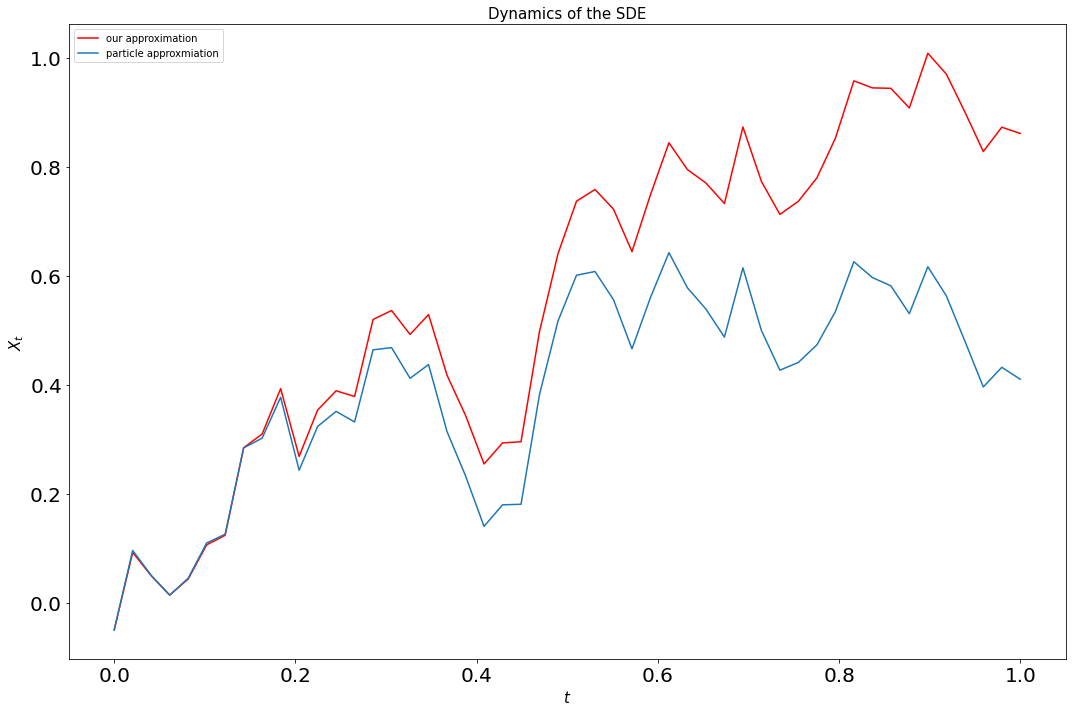

In [69]:
n_discr = 50
n_discr_2 = 200
T = 1
dt = T / n_discr

# Initialise the starting value, starting guess for gamma and diffusion constant
x_0 = 1
sigma = 1


dW_t = simulate_dW((n_part,n_discr_2),T)
X_true = SDE_Kuramoto_MV(x_0, sigma, dW_t, T, n_discr, n_part)

# dW_t_truncated = dW_t[0]
X_test = SDE_Kuramoto_appr(X_true.x_0[0], sigma, gamma_aver, dW_t[0], T, n_discr)


t = np.linspace(0, T, n_discr)
        
fig, ax = plt.subplots(1,1,figsize=(15, 10), tight_layout=True)

ax.set_title(r"Dynamics of the SDE", fontsize = 15)
ax.set_xlabel(r'$t$',fontsize=15)
ax.set_ylabel(r'$X_t$',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize = 20)
ax.tick_params(axis='both', which='minor', labelsize = 20)

ax.plot(t, X_test.x, c = 'r', label = 'our approximation')
ax.plot(t, X_true.x[0], label = 'particle approxmiation')
plt.legend(loc='best')
plt.show()



In [75]:
n_mc = 10000

n_discr = 50

gamma_aver_mc = np.zeros((2, n_discr))

x_0 = 1


##### ToDo: Run MC 50 times and get the average of empirical averages

##### Or: Check sup for a first step, then include the second, include the others by changing the frequency;
##### 


for i in range(n_mc):
    dW_t = simulate_dW_1d(n_discr,T)
    X = SDE_Kuramoto_appr(x_0, sigma, gamma_aver, dW_t, T, n_discr)
    gamma_aver_mc[0] = gamma_aver_mc[0] * i / (i + 1) + np.sin(X.x) * 1 / (i + 1)
    gamma_aver_mc[1] = gamma_aver_mc[1] * i / (i + 1) + (-np.cos(X.x)) * 1 / (i + 1)

print(f'The difference between MC gamma_aver and gamma_aver from the algorithm is: \n\n{gamma_aver_mc - gamma_aver}')

print(f'\nThe maximum norm is {abs(gamma_aver_mc - gamma_aver).max()}.')

The difference between MC gamma_aver and gamma_aver from the algorithm is: 

[[ 0.03803826 -0.14122841 -0.12769225 -0.19737977 -0.12337392 -0.16639052
  -0.1420093  -0.17387911 -0.13926442 -0.12509449 -0.15737393 -0.10814434
  -0.11117646 -0.12582785 -0.03862599 -0.10215937 -0.10346485 -0.06302092
  -0.07747901 -0.0773766  -0.05563116 -0.06620914 -0.07871266 -0.02300366
  -0.08082125 -0.07409399 -0.09941531 -0.03749441 -0.08238331 -0.04825914
  -0.07511557 -0.07568213 -0.0920244  -0.07911452 -0.05856008 -0.0721665
  -0.04384603 -0.05139535 -0.07968037 -0.09082087 -0.06106107 -0.05717419
  -0.10232587 -0.11801199 -0.07959144 -0.11309544 -0.1295304  -0.13643289
  -0.11938391 -0.13106958]
 [-0.55187837 -0.47193033 -0.43468132 -0.46131568 -0.50613658 -0.47329525
  -0.44692246 -0.49284485 -0.43744424 -0.47106246 -0.46754857 -0.4405948
  -0.40905697 -0.3685956  -0.38106794 -0.43399543 -0.34835386 -0.36512776
  -0.36134156 -0.39923986 -0.41428809 -0.40842727 -0.42158438 -0.35554471
  -0.36279